# **Loan Status Prediction**

Reason behind of this projects is personal.   
Recently I applied for Loan where my application was rejected I have good civil score and good salary packages I wanted to the reason behind how my loan got rejected. I did research and found out this dataset in kaggle and built this model and understood many other parameter which could be cause of rejection of a lean application other than only civil score.


In [1]:
# Importing the dependencies 

import pandas as pd                         #importing pandas
import numpy as np                          #importing numpy
import seaborn as sns                       #data plotting 
import matplotlib.pyplot                    #importing for plotting 
from sklearn.preprocessing import LabelEncoder      #importing to convert object type data to numerical
from sklearn.model_selection    import train_test_split         #for data splitting 
from sklearn import svm                     #importing support vector machine 
from sklearn.metrics import accuracy_score  #to check model accuracy score 

### **Data Collection & Precessing**

In [2]:
#loading the dataset

data = pd.read_csv('/Users/najir/Documents/Data Analysis /Projects/Loan Status Prediction/loan_pred_data.csv', encoding_errors='ignore')

#printing dataset
print("Dataset contains rows and columns of ", data.shape)

Dataset contains rows and columns of  (614, 13)


In [3]:
#printing first 5 rows 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#printing last 5 rows
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#statistical measures
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#printing all columns
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking missing valus in each column

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#replacing missing values for object types data we are replacing by mode, else replacing by mean

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)
        
#checking data types
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

**Replace Loan status columns**  
  
Y --> 1  
N --> 0

In [12]:
#Label encoding with replace method 

data.replace({"Loan_Status" : {'N' :0, 'Y': 1}}, inplace=True)

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [13]:
#Dependent Columns values

data['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
#Replacing 3+ value with 4 (as our model will give error )

data.replace({'Dependents': {'3+' : 4}}, inplace=True)

data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

## **Data Visualization**

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Education', ylabel='count'>

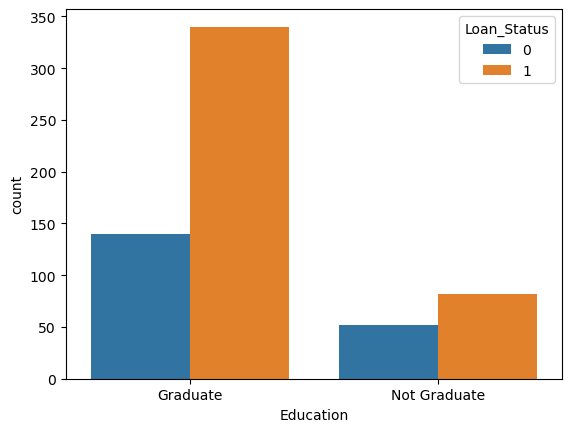

In [15]:
#Education and Loan Status

sns.countplot(x='Education', hue='Loan_Status', data=data)

**Obserbation**
- For Non graduated loan rejection % is high
- For Graduated Loan Rejection % is less

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Married', ylabel='count'>

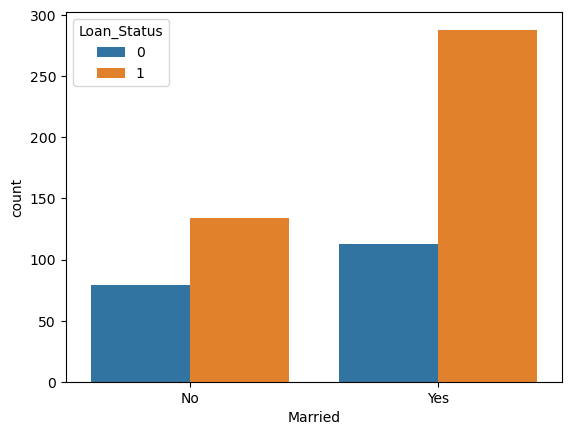

In [16]:
#checking for marital staus how target is related 

sns.countplot(x = 'Married', hue='Loan_Status', data=data)

**Obserbation**
- For Non Married loan rejection % is high and approval is less
- For Married Loan Approval higher and rejection is less

In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Gender', ylabel='count'>

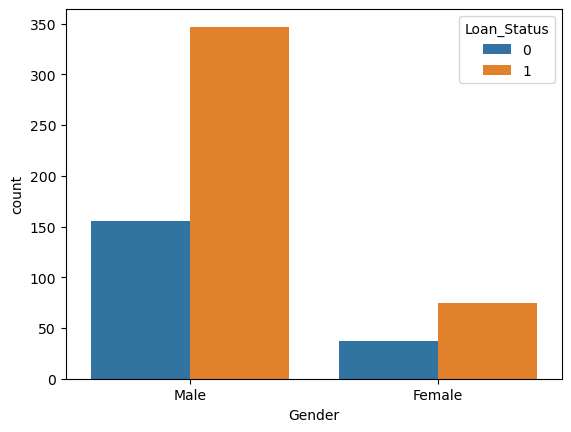

In [18]:
#checking for Gender staus how target is related 

sns.countplot(x = 'Gender', hue='Loan_Status', data=data)

In [19]:
#Converting categorical columns to numerical values

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [20]:
#changing Dependent column data type to int
data['Dependents'] = data['Dependents'].astype('int')

In [21]:
#using label econder to convert columns to numerical 



# Initialize a label encoder
label_encoder = LabelEncoder()


categorical_columns = ['Loan_ID', 'Gender', 'Married', 'Education',  'Self_Employed', 'Property_Area']

for col in categorical_columns:
    data[col] =  label_encoder.fit_transform(data[col])


#checking datatypes
data.dtypes

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## **Modelling and Features Engineering**

In [23]:
#Creating two variable X = Features columns and 

X = data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)           #droppping Loan_ID is its not useful, and Loan_Status

Y = data['Loan_Status']                                     #Target

print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           4          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [24]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [25]:
#Splitting data to start the model
#Creating four variable to split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, stratify=Y)           #testsize = 10, stratified labe to me almost equally   


/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [26]:

#printing the shape 

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)         

(552, 11) (62, 11) (552,) (62,)


### **Training Modelling**

**Support Vector Machine Model**

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
#Trainging the support vector machine model

classifier.fit(X_train, Y_train)

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

SVC(kernel='linear')

## **Model Evaluation**

In [29]:
#accuracy on training data

pred_on_training_data = classifier.predict(X_train)

accuracy_on_training_data = accuracy_score(Y_train, pred_on_training_data)

accuracy_on_training_data

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

0.7952898550724637

In [30]:

print("Accuray on Training Data {:.2%}".format(accuracy_on_training_data ))

Accuray on Training Data 79.53%


In [31]:
#Accuracy on Test Data

pred_on_test_data = classifier.predict(X_test)

accuracy_on_test_data = accuracy_score(Y_test, pred_on_test_data)


print("Accuray on Test/Unseen Data {:.2}".format(accuracy_on_test_data ))

Accuray on Test/Unseen Data 0.82


/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

In [45]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
243,1,1,2,0,1,6250,1300.0,108.0,360.0,1.0,0
507,1,0,0,0,0,3583,0.0,96.0,360.0,1.0,2
32,1,0,1,0,1,4692,0.0,106.0,360.0,1.0,0
223,1,1,0,0,0,7578,1010.0,175.0,342.0,1.0,1
515,1,1,4,0,0,3466,3428.0,150.0,360.0,1.0,0


In [32]:

print("Accuray on Test/Unseen Data {:.2%}".format(accuracy_on_test_data ))

Accuray on Test/Unseen Data 82.26%


# **Conclusion**

### Data Preprocessing
1. **Data Preprocessing:**
   - Missing values in object-type data were replaced with the mode (most frequent value).
   - Missing values in numerical data were replaced with the mean.
   - Unnecessary columns were dropped from the dataset.

### Label Encoding
2. **Label Encoding:**
   - Categorical data was converted to numerical format using label encoding.

### Model Selection
3. **Model Selection:**
   - A Support Vector Machine (SVM) model with a linear kernel was chosen for loan status prediction.

### Model Training and Evaluation
4. **Model Training and Evaluation:**
   - The SVM model achieved an accuracy of 79.53% on the training data.
   - On the test data, the model demonstrated good generalization with an accuracy of 82.26%.

I understood behind loan accepted/rejection many factors plays important role  

The project successfully addressed the task of loan status prediction, providing a valuable tool for assessing loan applications.
